# Exercise 11-1: Create a multiple regression

## Import the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [4]:
# read the info.txt file and rename the Length columns so they're more descriptive
fish.info()
fish.rename(columns={'Length1':'VerticalLength', 'Length2':'DiagonalLength', 'Length3':'CrossLength'}
           ,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Identify a correlation

In [5]:
# get the correlation data for the Weight column
fish.corr()[['Weight']]

/var/folders/rj/tzk4w23s0md7pcnpq4w2fy6c0000gn/T/ipykernel_56725/1560990702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fish.corr()[['Weight']]


,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


/var/folders/rj/tzk4w23s0md7pcnpq4w2fy6c0000gn/T/ipykernel_56725/2955795467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=fish.corr(), annot=True, cmap='Blues')


<Axes: >

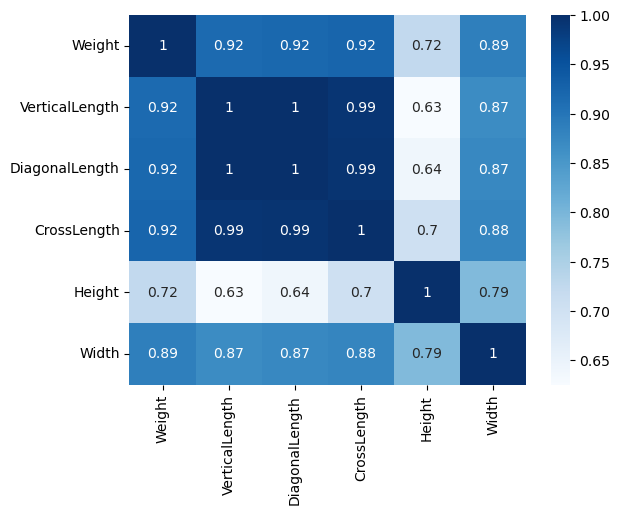

In [6]:
# create a heatmap for the correlation data
sns.heatmap(data=fish.corr(), annot=True, cmap='Blues')

## Create a multiple regression model

In [7]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream = fish.query('Species=="Bream"')


In [8]:
# split the training and test data 
x_train, x_test, y_train, y_test = train_test_split(fish[['VerticalLength', 'Height', 'Width']], fish['Weight'], random_state=1)

In [9]:
# create the model and fit the training data
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# score the testing data
model.score(x_test, y_test)

0.8672135157757638

In [11]:
# make the predictions
y_predicted = model.predict(x_test)


In [12]:
# join the predicted data with the original data
predicted = pd.DataFrame(data=y_predicted, columns=['predictedWeight'])
predicted = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
predicted

,predictedWeight,VerticalLength,Height,Width,Weight
0,774.235620,33.5,18.9570,6.6030,1000.0
1,165.362977,19.4,6.1146,3.2943,120.0
2,564.863829,29.4,14.9544,5.1708,600.0
3,206.178795,20.5,5.8560,3.6240,130.0
4,98.756573,18.2,5.0820,2.7720,85.0
5,628.218316,31.0,14.4738,5.7276,650.0
6,208.265066,20.5,6.6339,3.5478,145.0
7,522.902081,28.7,14.3714,4.8146,500.0
8,164.180007,19.0,6.4752,3.3516,0.0
9,253.782904,22.0,6.3750,3.8250,145.0


## Plot the residuals

In [13]:
# calculate the residuals and store them in a column
predicted['residuals'] = predicted['Weight'] - predicted['predictedWeight']

<Axes: xlabel='residuals', ylabel='Density'>

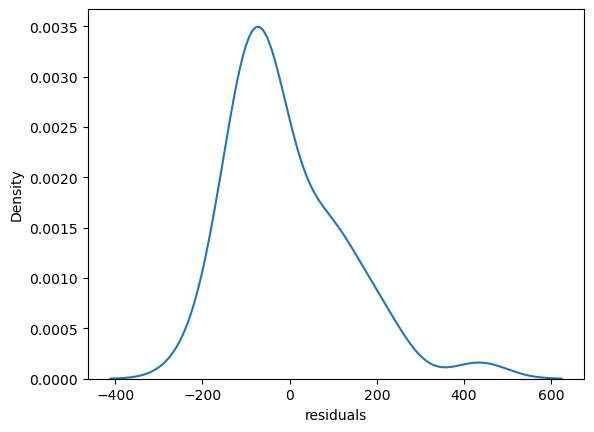

In [14]:
# create a KDE plot for the residuals
sns.kdeplot(data=predicted, x='residuals')